In [51]:
# Ingesting the data
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [52]:
data = pd.read_csv(r"C:\Users\dipes\OneDrive\Desktop\hra_prediction\notebooks\data\heart_attack_prediction_dataset.csv")

In [53]:
data.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Text(0, 0.5, 'Number')

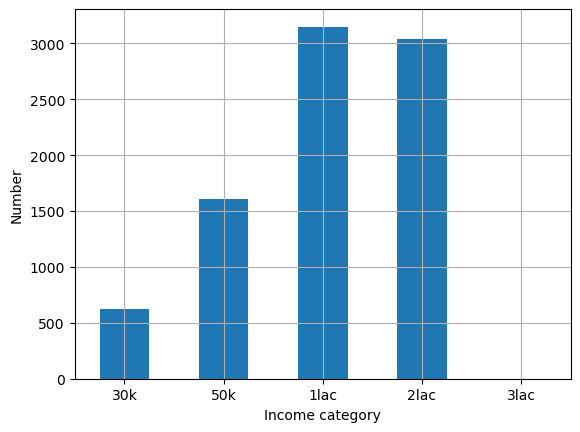

In [55]:
import numpy as np 

data["income_cat"] = pd.cut(data["Income"],
 bins=[30000, 50000, 100000, 200000, 300000, np.inf],
 labels=['30k','50k', '1lac','2lac', '3lac'])
#These income categories are represented in Figure 2-9:
data["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number")

In [33]:
data.shape

(8763, 27)

In [34]:
data.isnull().sum()

Patient ID                           0
Age                                  0
Sex                                  0
Cholesterol                          0
Blood Pressure                       0
Heart Rate                           0
Diabetes                             0
Family History                       0
Smoking                              0
Obesity                              0
Alcohol Consumption                  0
Exercise Hours Per Week              0
Diet                                 0
Previous Heart Problems              0
Medication Use                       0
Stress Level                         0
Sedentary Hours Per Day              0
Income                               0
BMI                                  0
Triglycerides                        0
Physical Activity Days Per Week      0
Sleep Hours Per Day                  0
Country                              0
Continent                            0
Hemisphere                           0
Heart Attack Risk        

In [35]:
data[['Max BP','Min BP']] = data['Blood Pressure'].str.split('/',expand=True)

In [36]:
data.duplicated().sum()

0

In [37]:
hr =  data[data['Heart Attack Risk']==1]

In [38]:
hr['Diet'].value_counts()

Healthy      1079
Unhealthy    1034
Average      1026
Name: Diet, dtype: int64

In [39]:
data = data[['Age','Sex','Cholesterol','Heart Rate','Diabetes','Smoking','Alcohol Consumption','Previous Heart Problems','Medication Use','Triglycerides','Heart Attack Risk','Max BP','Min BP']]

In [40]:
data.head(3)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Smoking,Alcohol Consumption,Previous Heart Problems,Medication Use,Triglycerides,Heart Attack Risk,Max BP,Min BP
0,67,Male,208,72,0,1,0,0,0,286,0,158,88
1,21,Male,389,98,1,1,1,1,0,235,0,165,93
2,21,Female,324,72,1,0,0,1,1,587,0,174,99


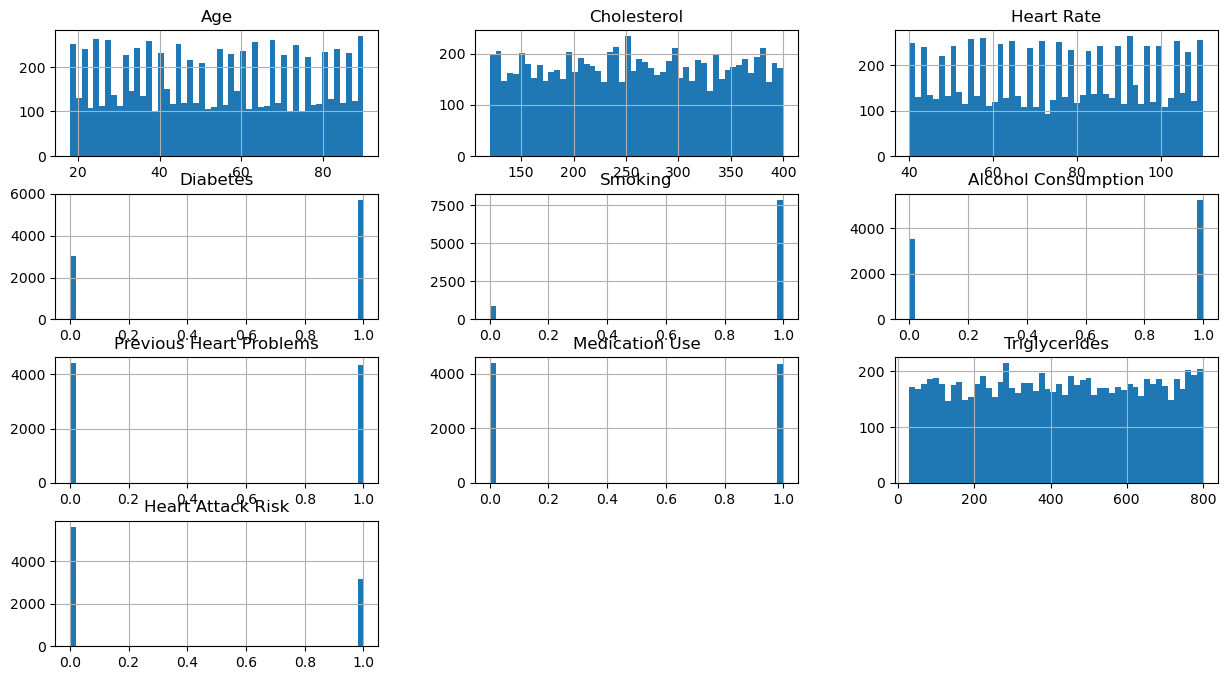

In [41]:
data.hist(bins=50,figsize=(15,8))
plt.show()

In [42]:
pd.crosstab(data['Diabetes'],data['Heart Attack Risk'])

Heart Attack Risk,0,1
Diabetes,,
0,1990,1057
1,3634,2082


In [43]:
pd.crosstab(data['Smoking'],data['Heart Attack Risk'])

Heart Attack Risk,0,1
Smoking,,
0,575,329
1,5049,2810


In [44]:
pd.crosstab(data['Previous Heart Problems'],data['Heart Attack Risk'])

Heart Attack Risk,0,1
Previous Heart Problems,,
0,2836,1582
1,2788,1557


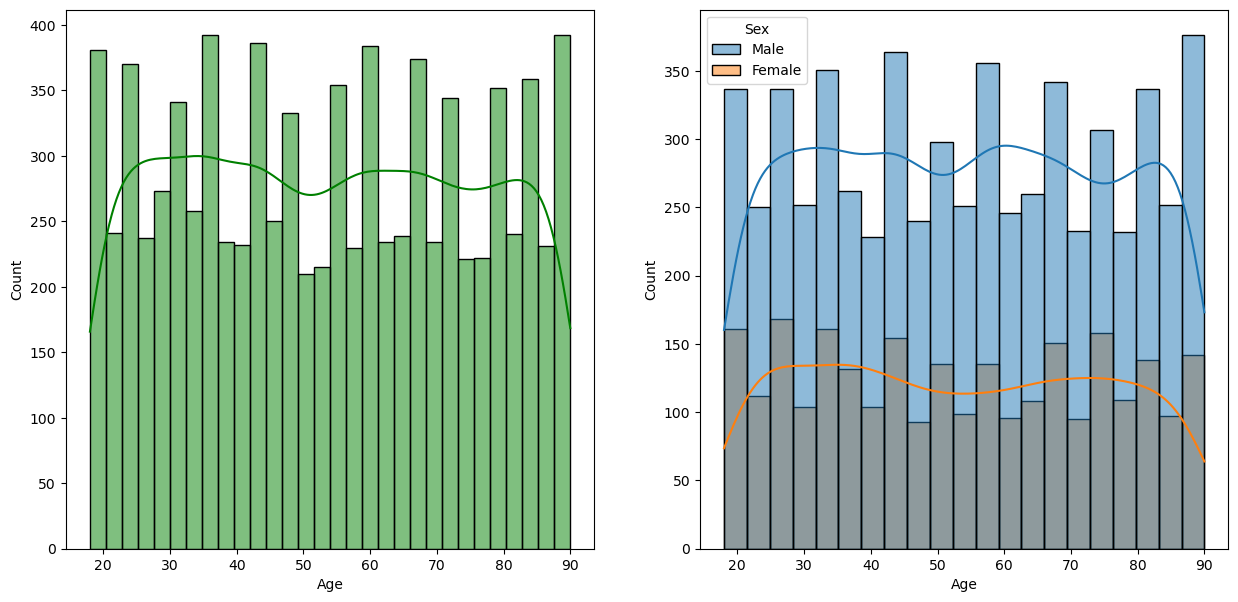

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='Age',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='Age',kde=True,hue='Sex')
plt.show()

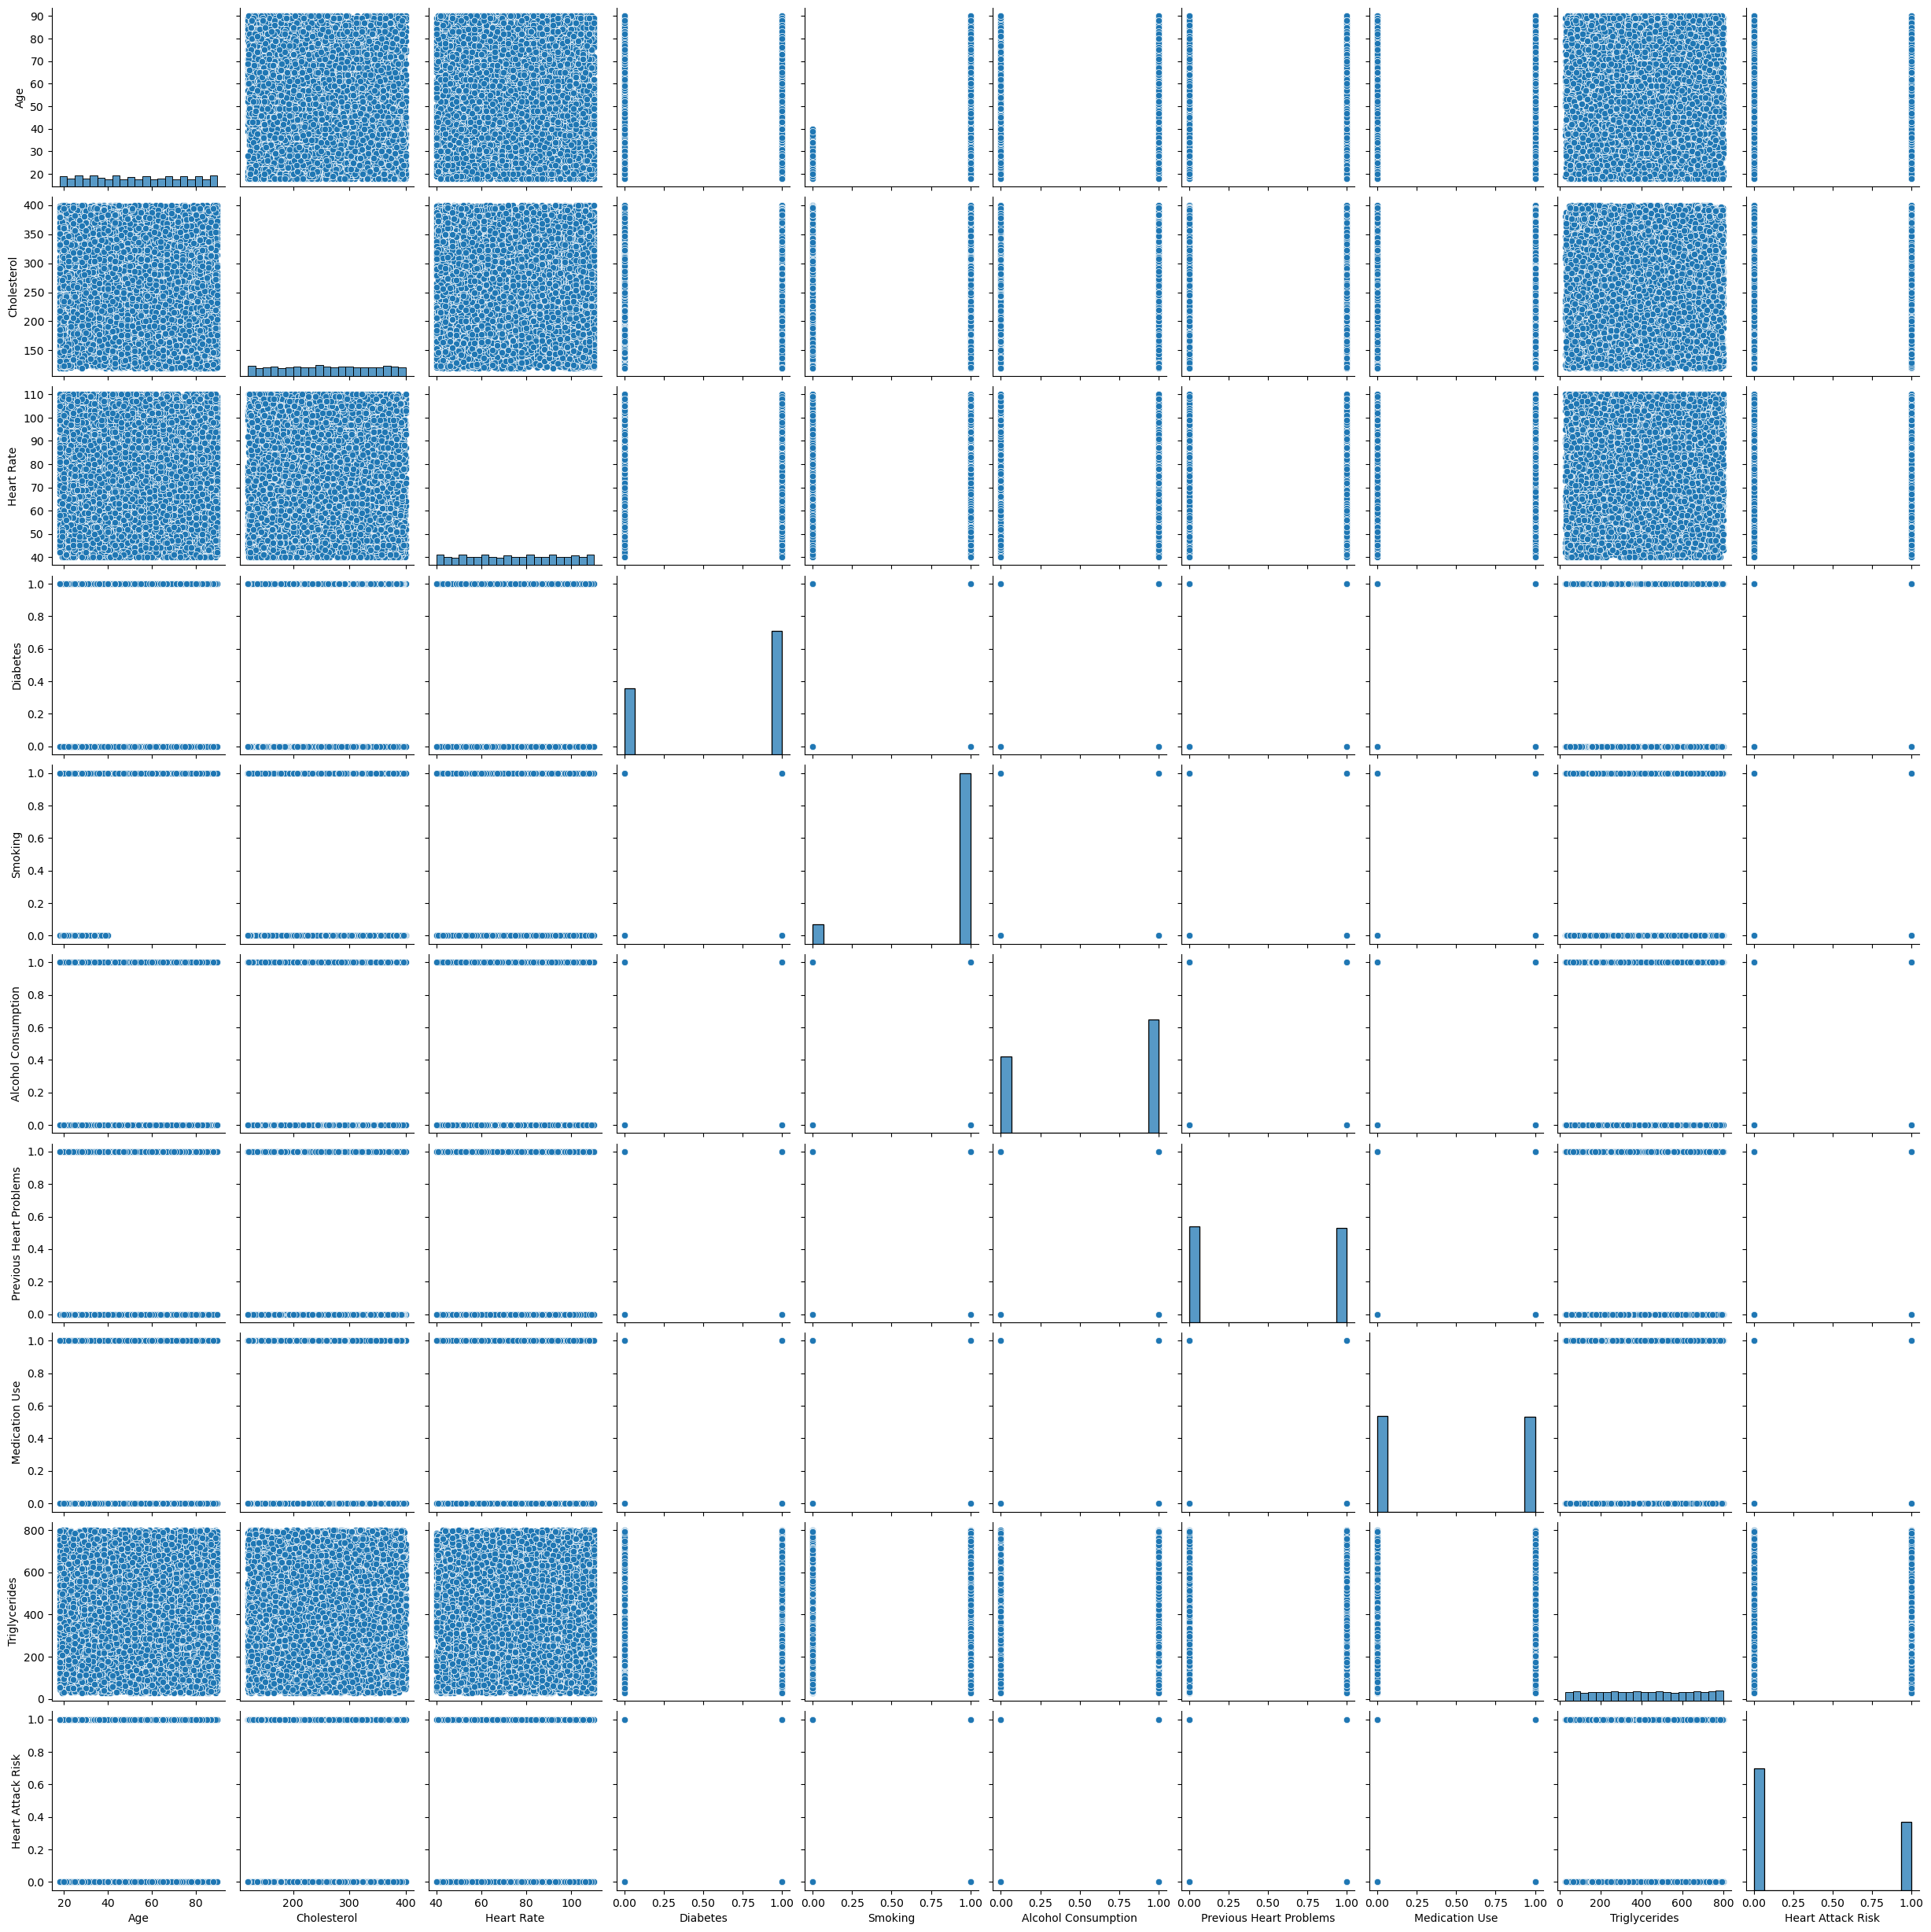

In [46]:
sns.pairplot(data)